# Formative Assessment ( Data Preprocessing )
Objective: The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.

Dataset: https://drive.google.com/file/d/1F3lRf32JM8ejnXq-Cbf9y7fa57zSHGz_/view?usp=sharing

Key Components to be fulfilled:

Data Exploration: Explore the data, list down the unique values in each feature and find its length. Perform the statistical analysis and renaming of the columns.

Data Cleaning: Find the missing and inappropriate values, treat them appropriately. Remove all duplicate rows. Find the outliers. Replace the value 0 in age as NaN Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

Data Analysis: Filter the data with age >40 and salary<5000 Plot the chart with age and salary Count the number of people from each place and represent it visually

Data Encoding: Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

Feature Scaling: After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
employee=pd.read_csv("//content//Employee.csv")
employee

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


###Dataset information
Welcome to Employee dataset. This dataset provides 148 rows and 8 columns.

|No.|Attributes|Description|Data type|
|----|----|-----|---|
|1|Company    |Compony name   |objective   |
|2|Age|Age|Numerical|
|3|Salary|Salary|Numerical/float|
|4|Place|Place|Objective|
|5|Country|Country(INDIA)|Objective|
|6|Gender|Gender(0/1)|categorical|


### Initial Information About The Dataset

In [ ]:
employee.head(5).T

,0,1,2,3,4
Company,TCS,Infosys,TCS,Infosys,TCS
Age,20.0,30.0,35.0,40.0,23.0
Salary,NaN,NaN,2300.0,3000.0,4000.0
Place,Chennai,Mumbai,Calcutta,Delhi,Mumbai
Country,India,India,India,India,India
Gender,0,0,0,0,0


In [ ]:
employee.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,130.0,30.484615,11.096640,0.0,22.0,32.5,37.75,54.0
Salary,124.0,5312.467742,2573.764683,1089.0,3030.0,5000.0,8000.00,9876.0
Gender,148.0,0.222973,0.417654,0.0,0.0,0.0,0.00,1.0


In [ ]:
employee.describe(include=object).T

,count,unique,top,freq
Company,140,6,TCS,53
Place,134,11,Mumbai,37
Country,148,1,India,148


In [ ]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [ ]:
print(employee.Company.unique())
print("no.of.unique values in Company column:",len(employee.Company.unique()))
print("length of Company column:",len(employee.Company))

['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
no.of.unique values in Company column: 7
length of Company column: 148


In [ ]:
print(employee.Age.unique())
print("no.of.unique values in Age column:",len(employee.Age.unique()))
print("length of Age column:",len(employee.Age))

[20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
no.of.unique values in Age column: 30
length of Age column: 148


In [ ]:
print(employee.Salary.unique())
print("no.of.unique values in Salary column:",len(employee.Salary.unique()))
print("length of Salary column:",len(employee.Salary))

[  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
no.of.unique values in Salary column: 41
length of Salary column: 148


In [ ]:
print(employee.Place.unique())
print("no.of.unique values in Place column:",len(employee.Place.unique()))
print("length of Place column:",len(employee.Place))

['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
no.of.unique values in Place column: 12
length of Place column: 148


In [ ]:
print(employee.Gender.unique())
print("no.of.unique values in Gender column:",len(employee.Gender.unique()))
print("length of Gender column:",len(employee.Gender))

[0 1]
no.of.unique values in Gender column: 2
length of Gender column: 148


In [ ]:
company_analysis=employee.Company.value_counts(dropna=False)
company_analysis

,count
Company,
TCS,53
Infosys,45
CTS,36
NaN,8
Tata Consultancy Services,2
Congnizant,2
Infosys Pvt Lmt,2


<ipython-input-13-ef0a2e609580>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(employee.Company,palette='flare')


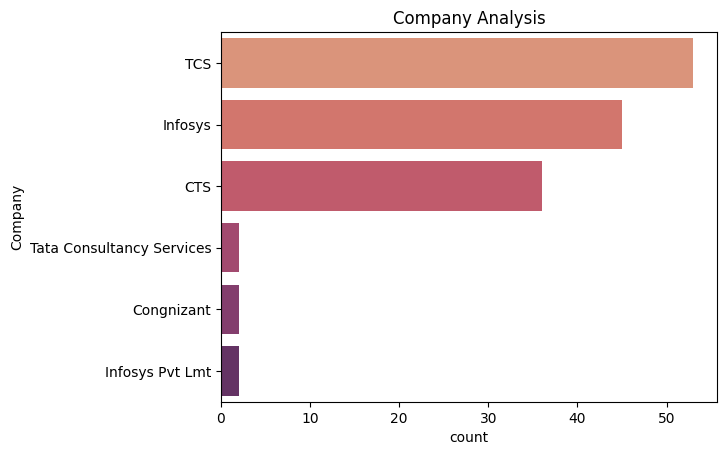

In [ ]:
sns.countplot(employee.Company,palette='flare')
plt.title("Company Analysis")
plt.show()

Age
NaN     18
22.0    16
33.0    13
44.0    10
21.0     8
23.0     8
34.0     8
32.0     7
35.0     6
0.0      6
41.0     5
43.0     4
24.0     4
45.0     4
31.0     3
25.0     3
20.0     3
36.0     3
40.0     3
26.0     2
30.0     2
46.0     2
50.0     2
37.0     2
19.0     1
38.0     1
51.0     1
18.0     1
17.0     1
54.0     1
Name: count, dtype: int64


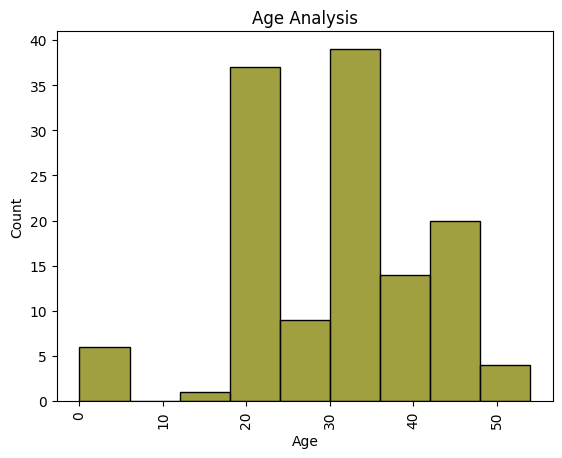

In [ ]:
age_analysis=employee.Age.value_counts(dropna=False)
print(age_analysis)
sns.histplot(employee.Age,color='olive')
plt.title("Age Analysis")
plt.xticks(rotation=90)
plt.show()


Salary
NaN       24
3000.0     9
5000.0     6
4034.0     5
5034.0     5
8202.0     5
7084.0     4
5835.0     4
8787.0     4
2934.0     4
2034.0     4
2300.0     4
9284.0     4
8345.0     4
8943.0     4
3184.0     4
4824.0     4
9024.0     4
3045.0     4
1234.0     4
1089.0     4
8000.0     3
3030.0     3
6000.0     3
9000.0     3
7000.0     3
3234.0     2
9876.0     2
7654.0     2
4000.0     2
4345.0     1
6544.0     1
6543.0     1
4324.0     1
5435.0     1
5555.0     1
3454.0     1
5654.0     1
5009.0     1
5098.0     1
3033.0     1
Name: count, dtype: int64


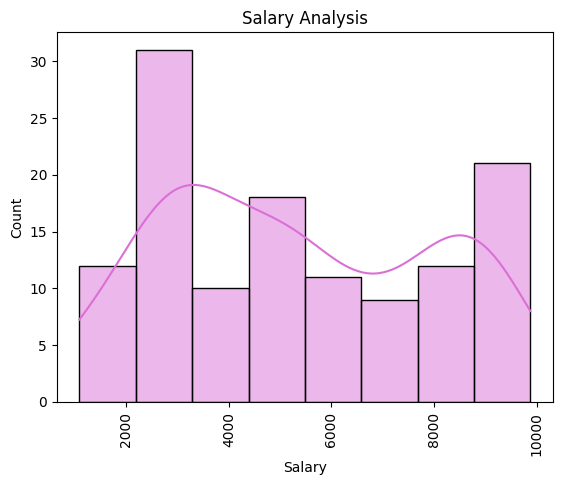

In [ ]:
salary_analysis=employee.Salary.value_counts(dropna=False)
print(salary_analysis)
sns.histplot(employee.Salary,kde=True,color="orchid")
plt.title("Salary Analysis")
plt.xticks(rotation=90)
plt.show()

Place
Mumbai        37
Calcutta      33
Chennai       14
Delhi         14
NaN           14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64


<ipython-input-17-f139416879b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(employee.Place,palette="flare")


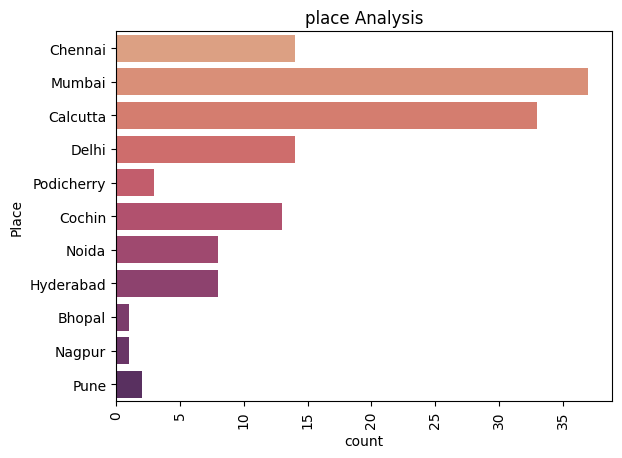

In [ ]:
place_analysis=employee.Place.value_counts(dropna=False)
print(place_analysis)
sns.countplot(employee.Place,palette="flare")
plt.title("place Analysis")
plt.xticks(rotation=90)
plt.show()

Gender
0    115
1     33
Name: count, dtype: int64


<ipython-input-16-71e0af7f23ac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=employee,x='Gender',palette="flare")


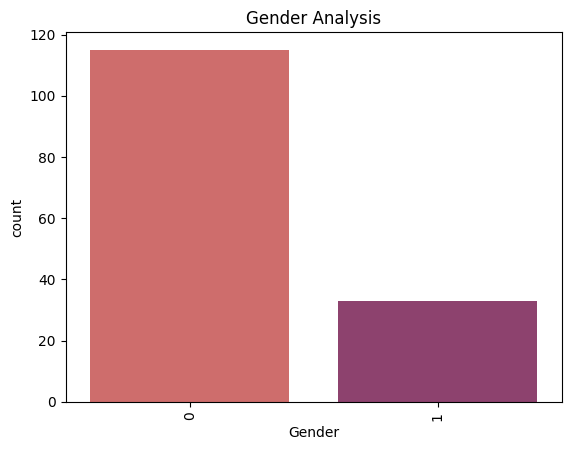

In [ ]:
gender_analysis=employee.Gender.value_counts(dropna=False)
print(gender_analysis)
sns.countplot(data=employee,x='Gender',palette="flare")
plt.title("Gender Analysis")
plt.xticks(rotation=90)
plt.show()

### Data Cleaning

In [3]:
employee['Age'].fillna(value = 0,inplace = True)

In [4]:
employee.drop_duplicates(inplace=True)

In [ ]:
employee.Company.mode()

,Company
0,TCS


In [8]:
employee['Company'].fillna(value='TCS',inplace =True)

In [ ]:
employee.Place.mode()

,Place
0,Mumbai


In [5]:
employee['Place'].fillna(value='Mumbai',inplace =True)

In [6]:
employee['Salary'].fillna(value=employee.Salary.mean(),inplace =True)

In [9]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  144 non-null    object 
 1   Age      144 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    144 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB


<Axes: ylabel='Age'>

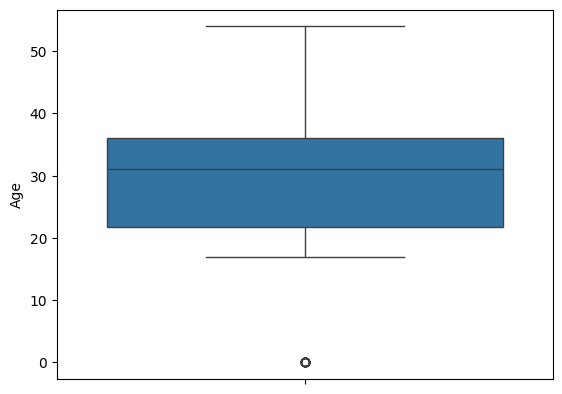

In [ ]:
sns.boxplot(employee.Age)

<Axes: xlabel='Age', ylabel='Count'>

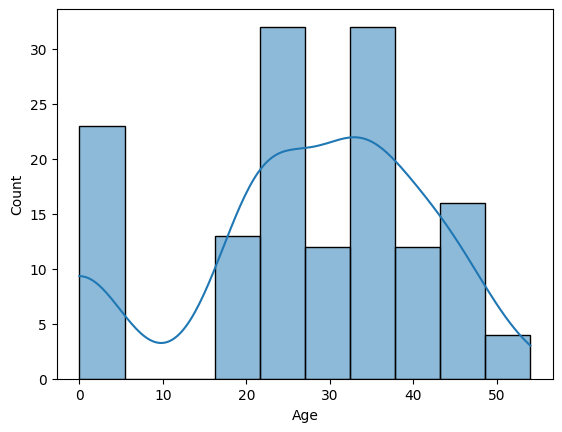

In [ ]:
sns.histplot(employee.Age,kde=True)

<Axes: ylabel='Salary'>

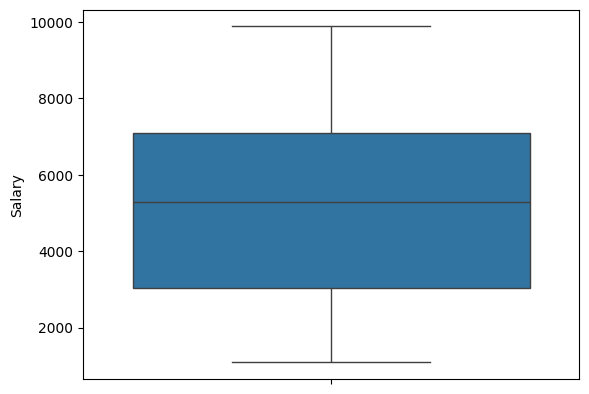

In [ ]:
sns.boxplot(employee.Salary)

<Axes: xlabel='Salary', ylabel='Count'>

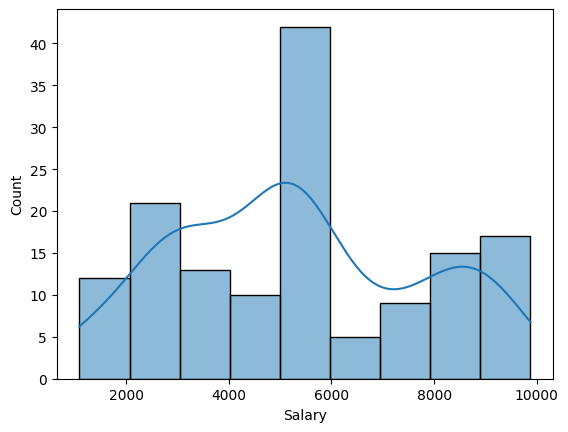

In [ ]:
sns.histplot(employee.Salary,kde=True)

q1,iqr,q3 : 3045.0 4039.0 7084.0
upper limit,lower limit 13142.5 -3013.5
CAPPING
data length : 144


<Axes: ylabel='Salary'>

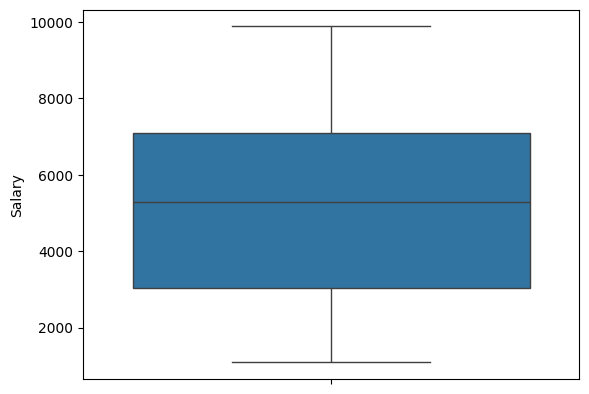

In [10]:
q1= employee['Salary'].quantile(0.25)
q3 = employee['Salary'].quantile(0.75)
iqr = q3-q1
print('q1,iqr,q3 :',q1,iqr,q3)
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print('upper limit,lower limit',ul,ll)
print('CAPPING')
employee.loc[(employee['Salary']>ul),'Salary']=ul
employee.loc[(employee['Salary']<ll),'Salary']=ll
data_length =len(employee)
print('data length :',data_length)
sns.boxplot(employee['Salary'])



q1,iqr,q3 : 21.75 14.25 36.0
upper limit,lower limit 57.375 0.375
CAPPING
data length : 144


<Axes: ylabel='Age'>

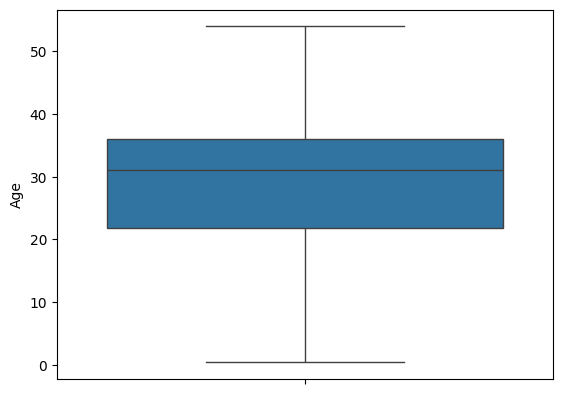

In [11]:
q1= employee['Age'].quantile(0.25)
q3 = employee['Age'].quantile(0.75)
iqr = q3-q1
print('q1,iqr,q3 :',q1,iqr,q3)
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print('upper limit,lower limit',ul,ll)
print('CAPPING')
employee.loc[(employee['Age']>ul),'Age']=ul
employee.loc[(employee['Age']<ll),'Age']=ll
data_length =len(employee)
print('data length :',data_length)
sns.boxplot(employee['Age'])



### Data Analysis

In [ ]:
employee_filt=employee[(employee['Age']>40) & (employee['Salary']<5000)]
print(employee_filt)
print('LENGTH OF THIS DATA',len(employee_filt))

     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1
LENGTH OF THIS DATA 15


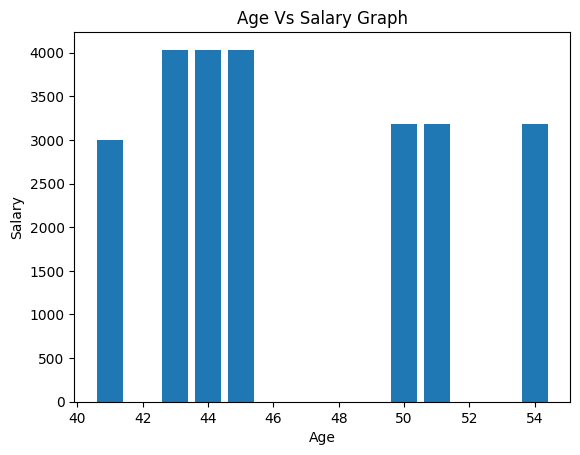

In [ ]:
plt.bar(employee_filt['Age'],employee_filt['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age Vs Salary Graph')
plt.show()

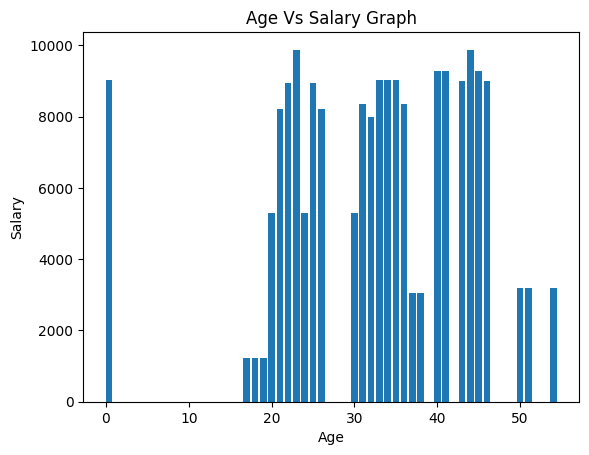

In [ ]:
plt.bar(employee['Age'],employee['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age Vs Salary Graph')
plt.show()

<Axes: xlabel='count', ylabel='Place'>

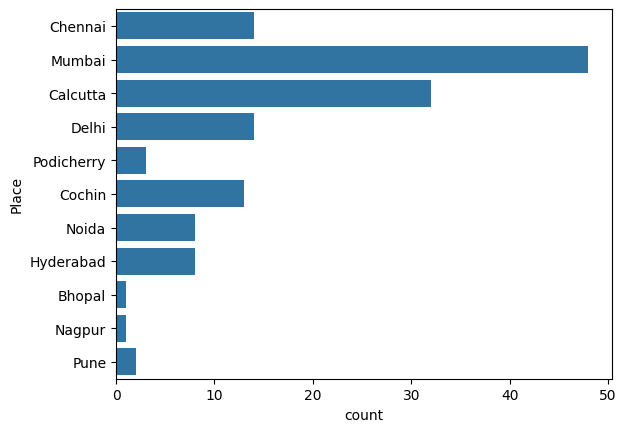

In [ ]:
sns.countplot(employee.Place)

### Data Encoding

In [14]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
employee['Company']=LE.fit_transform(employee['Company'])
print('Data After Transformation')
print(employee)


Data After Transformation
     Company   Age       Salary     Place Country  Gender
0          4  20.0  5283.471074   Chennai   India       0
1          2  30.0  5283.471074    Mumbai   India       0
2          4  35.0  2300.000000  Calcutta   India       0
3          2  40.0  3000.000000     Delhi   India       0
4          4  23.0  4000.000000    Mumbai   India       0
..       ...   ...          ...       ...     ...     ...
142        3  22.0  8202.000000    Mumbai   India       0
143        4  33.0  9024.000000  Calcutta   India       1
145        2  44.0  4034.000000     Delhi   India       1
146        4  33.0  5034.000000    Mumbai   India       1
147        2  22.0  8202.000000    Cochin   India       0

[144 rows x 6 columns]


In [16]:
employee['Place']=LE.fit_transform(employee['Place'])
print('Data After Transformation')
print(employee)

Data After Transformation
     Company   Age       Salary  Place Country  Gender
0          4  20.0  5283.471074      2   India       0
1          2  30.0  5283.471074      6   India       0
2          4  35.0  2300.000000      1   India       0
3          2  40.0  3000.000000      4   India       0
4          4  23.0  4000.000000      6   India       0
..       ...   ...          ...    ...     ...     ...
142        3  22.0  8202.000000      6   India       0
143        4  33.0  9024.000000      1   India       1
145        2  44.0  4034.000000      4   India       1
146        4  33.0  5034.000000      6   India       1
147        2  22.0  8202.000000      3   India       0

[144 rows x 6 columns]


### Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [26]:
X = employee.drop(columns=['Country','Salary'])
Y = employee['Salary']
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (144, 4)
Shape of Y: (144,)


In [27]:
min_max_scaler = MinMaxScaler()
X1 = min_max_scaler.fit_transform(X)


In [28]:
X1

array([[0.8       , 0.36596737, 0.2       , 0.        ],
       [0.4       , 0.55244755, 0.6       , 0.        ],
       [0.8       , 0.64568765, 0.1       , 0.        ],
       [0.4       , 0.73892774, 0.4       , 0.        ],
       [0.8       , 0.42191142, 0.6       , 0.        ],
       [0.4       , 0.        , 0.1       , 0.        ],
       [0.8       , 0.        , 0.2       , 1.        ],
       [0.4       , 0.42191142, 0.6       , 1.        ],
       [0.8       , 0.62703963, 0.1       , 1.        ],
       [0.        , 0.83216783, 0.4       , 0.        ],
       [0.        , 0.42191142, 0.6       , 0.        ],
       [0.        , 0.62703963, 0.1       , 0.        ],
       [0.        , 0.83216783, 0.2       , 0.        ],
       [0.        , 0.32867133, 0.6       , 0.        ],
       [0.4       , 0.73892774, 0.1       , 0.        ],
       [0.8       , 0.42191142, 0.4       , 0.        ],
       [0.4       , 0.42191142, 0.9       , 0.        ],
       [0.8       , 0.62703963,

In [30]:
standard_scaler = StandardScaler()
X2 = standard_scaler.fit_transform(X)
X2

array([[ 0.99148921, -0.49145546, -0.89325451, -0.53452248],
       [-0.23932498,  0.21228188,  0.7505621 , -0.53452248],
       [ 0.99148921,  0.56415054, -1.30420866, -0.53452248],
       [-0.23932498,  0.91601921, -0.07134621, -0.53452248],
       [ 0.99148921, -0.28033426,  0.7505621 , -0.53452248],
       [-0.23932498, -1.87253997, -1.30420866, -0.53452248],
       [ 0.99148921, -1.87253997, -0.89325451,  1.87082869],
       [-0.23932498, -0.28033426,  0.7505621 ,  1.87082869],
       [ 0.99148921,  0.49377681, -1.30420866,  1.87082869],
       [-1.47013917,  1.26788788, -0.07134621, -0.53452248],
       [-1.47013917, -0.28033426,  0.7505621 , -0.53452248],
       [-1.47013917,  0.49377681, -1.30420866, -0.53452248],
       [-1.47013917,  1.26788788, -0.89325451, -0.53452248],
       [-1.47013917, -0.63220292,  0.7505621 , -0.53452248],
       [-0.23932498,  0.91601921, -1.30420866, -0.53452248],
       [ 0.99148921, -0.28033426, -0.07134621, -0.53452248],
       [-0.23932498, -0.

I will choose one of them in the future part "model selection" based on the highest accuracy